## Basic Implementation of RBF Network with Gradient Descent 

The following is how to implement a basic RBF network with Gradient Descent only using 10 neurons. 


In [0]:
import RBFGrad
from RBFGrad import *
import numpy as np

### Instantiate
RBFGrad contains two classes:

``` RBFNeuron() ```
```RBFLayer()```


---


RBFLayer handles the input, output and training of the ensemble of each RBFNeuron. 

In [0]:
layer= RBFLayer()

###1. Add Neurons

>```RBFLayer.add(num_neurons=10):```






---


The Add() function will add a number of neurons. By default 10 neurons will be added. 

In [0]:
layer.add(10)
print ("number of neurons: " + str(layer.num_neurons))

number of neurons: 10


###2. Load Desired Data
The data must be normalized. In the example we will train the layer with MNIST 0

In [0]:
#for datasets only 
import tensorflow as tf 
(train_data,train_labels),(test_data,test_labels)= tf.keras.datasets.mnist.load_data()
zeros = train_data[np.where(train_labels==0)]


In [0]:
input_sample=zeros[0:20]
input_sample=input_sample.reshape(20,784) 
input_mean = np.mean(input_sample)
input_stdev=np.std(input_sample)
input_sample =input_sample-input_mean
input_sample=input_sample/input_stdev


###3. Load 'Prototype'



>```RBFLayer.initialize(inputs)```




---


This function will take a 1-D vector of data (inputs), and evenly split the data into a series of smaller vectors and store them as the 'basis' vector for each neuron in the layer. 

The function will also initialize a vector of weights the size of each basis vector. 

Once the neuron is assigned a basis vector it cannot be assigned another basis vector. 

In [0]:
layer.initialize(input_sample[0])

###4.Train the Neurons Using Similar Samples. 

This is done by two functions: 

>```RBFLayer.set_input(inputs)```


---


This will set the data the neuron will attempt to match it's prototype to. 



>```RBFLayer.trainNeurons(selectNeurons)```


---


This function will adjust weights to incorporate the input data into it's stored prototype, creating a prototype of the distribution of data. 

You must specify which neuron is to be trained. 

In the example below 10 neurons are trained. 

In [0]:
sample_number=0
for i in range(100):
  layer.set_input(input_sample[sample_number])
  if ctr<=19:
    layer.trainNeurons(range(0,10))
  ctr=ctr+1
  if ctr>19: 
    ctr=0

###5. Test Neuron

Gather test data, in this case it is MNIST 2, and MNIST 4. 

Perform inference from network using 

>```
RBFLayer.layerOutput(inputs=[])
```

Which is a function that accepts input vector, then splits the input vector into parts, to be presented to each appropriate neuron. The neurons will compare a MSE between the input and the prototype, and output 1-MSE(prototype-input). Activation is higher when MSE is lower. 

The function will output a value for every neuron. You can sum up all the output to come to a final activation level for the neuron

You will see in the resulting graph that the activation MNIST 0, was higher compared to the twos and fours, indicating that the neurons have learned. 


In [0]:
twos=train_data[np.where(train_labels==2)]
fours = train_data[np.where(train_labels==4)]

In [0]:
testData = np.zeros((62,28,28))
testData[0:20]=zeros[41:61] #these are MNIST data that was not present during training
testData[21:41]=twos[0:20]
testData[42:62]=fours[0:20]
testData= testData-input_mean 
testData=testData/input_stdev
testData=testData.reshape(62,784) 


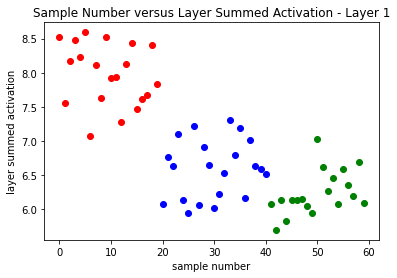

In [0]:
import matplotlib.pyplot as py
layerOutput=0
py.title('Sample Number versus Layer Summed Activation - Layer 1')
py.xlabel('sample number') 
py.ylabel('layer summed activation')

for i in range(60):
  neuron1=(sum(layer.layerOutput(testData[i])[0:10] ))
  if i<=19:
    py.scatter(i,neuron1,color='red') #Zeros 
  elif i>=20 and i<=40:
    py.scatter(i,neuron1,color='blue') #Twos 
  elif i>=41:
    py.scatter(i,neuron1,color='green')#Fours 
  